- MNIST 데이터를 불러오기.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split

In [2]:
train_orig = pd.read_csv('C:/Users/user/Desktop/mnist/train.csv')
test_orig = pd.read_csv('C:/Users/user/Desktop/mnist/test.csv')

In [3]:
X = train_orig.drop(['label'], axis = 1)

In [4]:
label = train_orig.label

In [5]:
y = pd.get_dummies(label, columns=['label'], drop_first=False)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1004)

In [7]:
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (48000, 784)
Shape of x_test : (12000, 784)
Shape of y_train : (48000, 10)
Shape of y_test : (12000, 10)


### 3.1 MNIST

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

DESCR : 데이터셋을 설명  
data : 데이터가 하나의 행, feature가 하나의 열로 구성된 배열을 가짐  
target : label을 담아놓은 배열

In [9]:
X,y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

70000개의 이미지는 28*28픽셀 이므로 784개의 feature을 가지고있음. 

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#이미지의 feature 벡터를 28*28 배열로 크기 변환
some_digit = X[5]
some_digit_image = some_digit.reshape(28,28)

#imshow 함수를 사용해 그려주기
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

In [12]:
y[5] # 위 이미지의 label

'2'

- 결과값이 문자열로 나옴.
- 머신러닝 알고리즘에서는 숫자를 사용하여야 하므로 y를 정수로 변환해줘야함

In [13]:
import numpy as np
y = y.astype(np.uint8)

In [14]:
y[5]

2

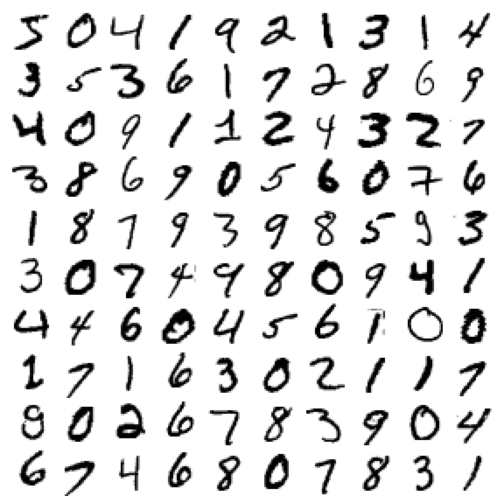

In [15]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size,size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row +1) * images_per_row]
        row_images.append(np.concatenate(rimages,axis=1))
    image = np.concatenate(row_images,axis=0)
    plt.imshow(image,cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
#save_fig("more_digits_plot")
plt.show()

데이터 분리

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

### 2.3. 이진 분류기 훈련
분류 작업을 위한 target vector 생성

In [17]:
y_train_2 = (y_train == 2)  # 2 : True, 나머지 : False
y_test_2 = (y_test == 2)

- 첫번째 모델 : SGDClassifier클래스의 확률적 경사 하강법 

SGD는 Loss function 계산 시 전체가 아닌 일부 데이터셋을 이용하기 때문에 속도가 빨라서 매우 큰 데이터셋을 다르는데 효과적

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_2)

SGDClassifier(random_state=42)

훈련된 모델을 이용해 숫자 2의 이미지를 감지

In [19]:
sgd_clf.predict([some_digit])

array([ True])

In [20]:
from sklearn.model_selection import cross_val_score

### 3.4 다중분류
Logistic Regression, SVM과 같은 알고리즘은 Binary Classification만 가능, 여러 개의 Binary Classifier를 사용하여 다중분류 구현이 가능   
클래스가 10개인 숫자 이미지 분류 시스템을 구현하는 방법은 0과 1 구별, 0과 2 구별, 1과 2구별(One vs One) 등 모든 숫자의 조합에 대해 Binary Classifier를 학습시키는 것.  
즉, 클래스가 N개면 Classifier는 N * (N-1) / 2 개가 필요  
MNIST의 경우 10개의 클래스 존재하므로 45개의 Classifier를 훈련시켜야 함

In [21]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([2], dtype=uint8)

In [22]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.7442516 , -0.30125634,  9.31399134,  7.26965016,  3.75753908,
         3.74771902,  0.71155138,  2.76650678,  8.2765048 ,  6.21840456]])

In [23]:
cross_val_score(svm_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.977 , 0.9738, 0.9739])

decision_function()을 사용하면 1개가 아니라, 데이터 당 10개의 점수를 반환한다.  
이 10개의 점수는 각 클래스 마다의 점수를 의미

In [24]:
np.argmax(some_digit_scores)

2

In [25]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [26]:
svm_clf.classes_[2]

2

In [27]:
svm_clf = SVC(C=3)
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([2], dtype=uint8)

In [28]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.73994947,  0.69894195,  9.31400387,  7.26766337,  2.7581735 ,
         4.75616294, -0.29127236,  2.78506741,  8.27651245,  6.21415264]])

In [29]:
cross_val_score(svm_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.98125, 0.9786 , 0.9792 ])

In [30]:
svm_clf = SVC(C=4)
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([2], dtype=uint8)

In [31]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.73887646,  0.69885944,  9.31384852,  7.26618863,  2.7587924 ,
         3.7571946 , -0.29093165,  3.79732044,  8.27533465,  6.21696275]])

In [32]:
cross_val_score(svm_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.9819, 0.9791, 0.9796])

In [33]:
svm_clf = SVC(C=5)
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([2], dtype=uint8)

In [34]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.73755115,  0.6986203 ,  9.31377335,  7.26570639,  2.76024312,
         3.75721749, -0.29078413,  3.80542372,  8.27538228,  6.21804741]])

In [35]:
cross_val_score(svm_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.9822 , 0.97895, 0.97925])

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [37]:
svm_clf = SVC(C=3)
svm_clf.fit(X_train_scaled, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [38]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.80874321,  2.77667718,  8.27703337,  7.26293476, -0.24797451,
         9.28647126,  2.76989558,  6.2184802 ,  2.71490893,  3.76919765]])

In [39]:
cross_val_score(svm_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.98125, 0.97855, 0.9792 ])

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [41]:
svm_clf = SVC(C=3)
svm_clf.fit(X_train_scaled, y_train)
svm_clf.predict([some_digit])

array([7], dtype=uint8)

In [42]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 0.73845616, -0.27116114,  8.25912074,  6.20354634,  2.81654939,
         5.05623754,  7.23860689,  9.2629338 ,  1.77195396,  3.96373172]])

In [43]:
cross_val_score(svm_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.9669 , 0.96585, 0.9662 ])

In [44]:
cross_val_score(svm_clf, X_train_scaled, y_train, cv = 4, scoring = "accuracy")

array([0.96786667, 0.9696    , 0.96673333, 0.96813333])

## 3.5 에러 분석

오차 행렬 살펴보기

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show ()

숫자 5는 상대적으로 어두워 보이는데, 이는 다른 숫자들만큼 Classification이 잘 되지 않았기 때문

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0) # 주대각선만 0으로 채움
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

행은 실제 클래스, 열은 예측한 클래스  
클래스 8의 열이 밝다는 것은 많은 이미지들이 8로 잘못 분류되었음을 의미

8로 잘못 분류되는 것을 계산할 필요가 있다.  예를 들어 8에 대한 데이터를 더 학습하거나, 8과 다른 숫자의 차이를 구별하여 해결하는 등 그 방법은 다양하게 존재한다.

개개의 에러를 분석해보면 Classifier가 무슨 일을 하고, 왜 잘못되었는지에 대해 통찰은 얻겠지만, 난이도는 훨씬 높고 시간도 오래 걸릴 것이다.  예를 들어 3과 5의 데이터를 비교

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## 3.6

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")